In [ ]:
!pip install -q mesa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.9/107.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.7/425.7 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 11

In [1]:
import networkx as nx
import numpy as np

In [ ]:
def generar_estimulo(coclea, largo):
  '''Genera un estímulo de largo 'largo' en la red coclea'''
  max = len(coclea) - largo
  inicio_estim = np.random.randint(0, max+1)
  return list(range(inicio_estim, inicio_estim + largo))

def vertices_estimulo(nucleo, estimulo):
  '''Devuelve los vértices del núcleo que están en el estímulo'''
  edges_estimulo = []
  for j in nucleo.edges():
    if j[0] in estimulo or j[1] in estimulo:
      edges_estimulo.append(j)
  return edges_estimulo

def actualizar_pesos(nucleo, edges_estimulo, estimulo):
  '''Actualiza los pesos de las aristas del núcleo que están en el estímulo'''
  for j in edges_estimulo:
    if j[0] in estimulo and j[1] in estimulo:
      nucleo[j[0]][j[1]]['weight'] = nucleo[j[0]][j[1]]['weight'] + 1
    else:
      nucleo[j[0]][j[1]]['weight'] = nucleo[j[0]][j[1]]['weight'] - 1
      
      
def eliminar_pesos_negativos(nucleo):
  '''Elimina las aristas con peso negativo'''
  for j in list(nucleo.edges()):
    if nucleo[j[0]][j[1]]['weight'] < 0:
      nucleo.remove_edge(j[0], j[1])

In [371]:
#Parámetros
n_neu = 25
l_estim = 8
pasos = 100

peso_inicial = 10

In [ ]:
coclea = list(range(0, n_neu))

nucleo = nx.complete_graph(n_neu)


#Inicialización de pesos
for u, v in nucleo.edges():
    nucleo[u][v]['weight'] = peso_inicial
    


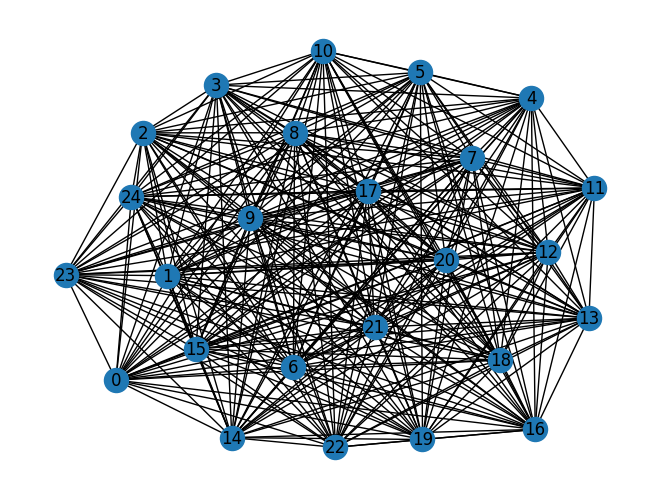

In [373]:
#plot nucleo
nx.draw(nucleo, with_labels=True)

In [374]:
for i in range(pasos):
  estim = generar_estimulo(coclea, l_estim)

  edges_estimulo = vertices_estimulo(nucleo, estim)
  
  actualizar_pesos(nucleo, edges_estimulo, estim)
  
  eliminar_pesos_negativos(nucleo)



In [363]:
nucleo.edges(data = True)

EdgeDataView([(0, 1, {'weight': 11}), (0, 2, {'weight': 9}), (0, 3, {'weight': 6}), (0, 4, {'weight': 2}), (0, 23, {'weight': 2}), (0, 24, {'weight': 5}), (1, 2, {'weight': 11}), (1, 3, {'weight': 8}), (1, 4, {'weight': 4}), (1, 23, {'weight': 1}), (1, 24, {'weight': 4}), (2, 3, {'weight': 12}), (2, 4, {'weight': 8}), (2, 5, {'weight': 1}), (2, 24, {'weight': 2}), (3, 4, {'weight': 14}), (3, 5, {'weight': 7}), (3, 6, {'weight': 4}), (4, 5, {'weight': 15}), (4, 6, {'weight': 12}), (4, 7, {'weight': 4}), (5, 6, {'weight': 20}), (5, 7, {'weight': 12}), (5, 8, {'weight': 1}), (6, 7, {'weight': 15}), (6, 8, {'weight': 4}), (7, 8, {'weight': 14}), (7, 9, {'weight': 6}), (8, 9, {'weight': 19}), (8, 10, {'weight': 11}), (8, 11, {'weight': 6}), (9, 10, {'weight': 15}), (9, 11, {'weight': 10}), (10, 11, {'weight': 17}), (10, 12, {'weight': 4}), (11, 12, {'weight': 11}), (12, 13, {'weight': 10}), (12, 14, {'weight': 8}), (12, 15, {'weight': 3}), (13, 14, {'weight': 23}), (13, 15, {'weight': 18}),

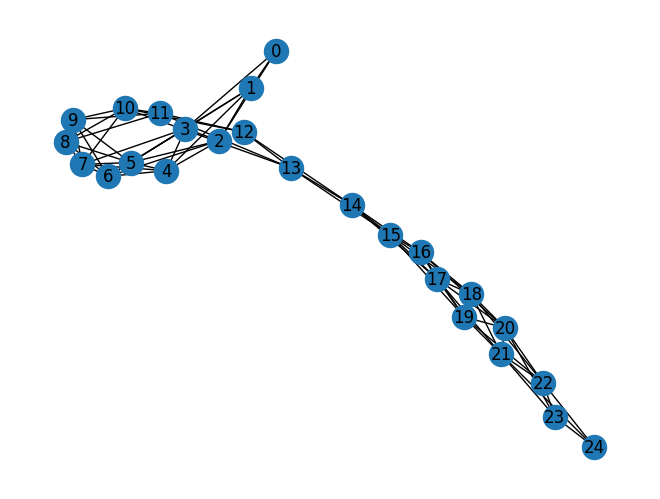

In [375]:
#plot nucleo
nx.draw(nucleo, with_labels=True)